# Generalized Linear Models and Elastic Nets (GLMNET)

### Objectives

1. Plot various methods of determining best $\lambda$
2. Benchmark and compare GLMNET implementation against `scikit-learn` implementations

## Setup

In [2]:
import numpy as np
from sklearn.datasets import load_boston, load_diabetes
from sklearn.linear_model import coordinate_descent as cd

import matplotlib.pyplot as plt

import glmnet

boston = load_boston()
diabetes = load_diabetes()
X, y = boston['data'], boston['target']
# X, y = diabetes['data'], diabetes['target']

lambdas = np.logspace(np.log10(1e-4), np.log10(35), 100)

## GLMNET examples

### Enet / Lasso

<IPython.core.display.Javascript object>


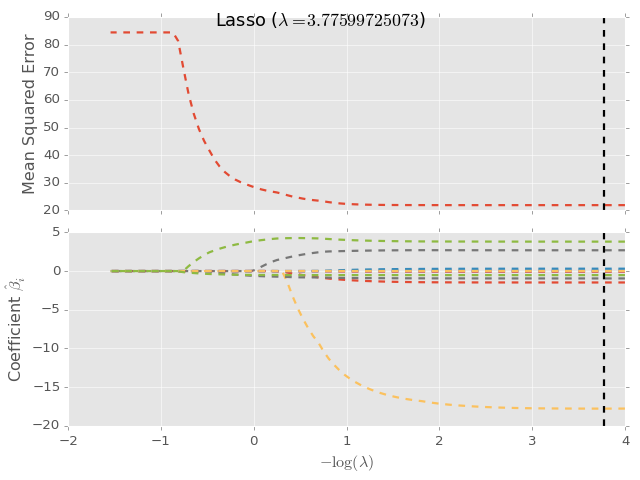

In [3]:
%matplotlib notebook

enet = glmnet.ElasticNet(lambdas=lambdas)
yhat = enet.fit(X, y).predict(X)

lasso = glmnet.Lasso(lambdas=lambdas)
yhat = lasso.fit(X, y).predict(X)

lasso.plot()

<IPython.core.display.Javascript object>


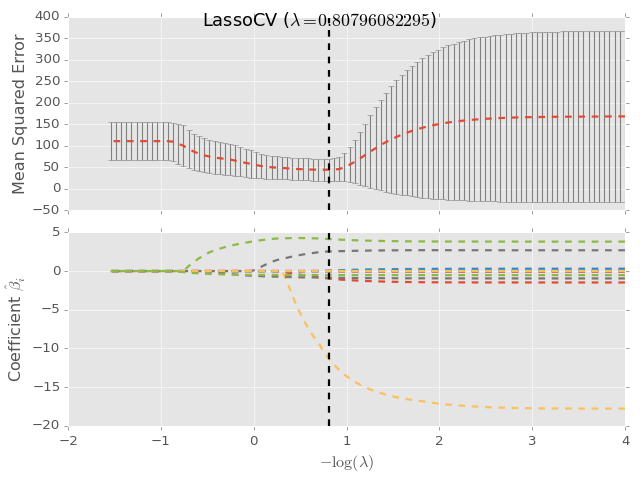

In [4]:
%matplotlib notebook
lassocv = glmnet.LassoCV(lambdas=lambdas)
yhat = lassocv.fit(X, y).predict(X)

lassocv.plot()

<IPython.core.display.Javascript object>


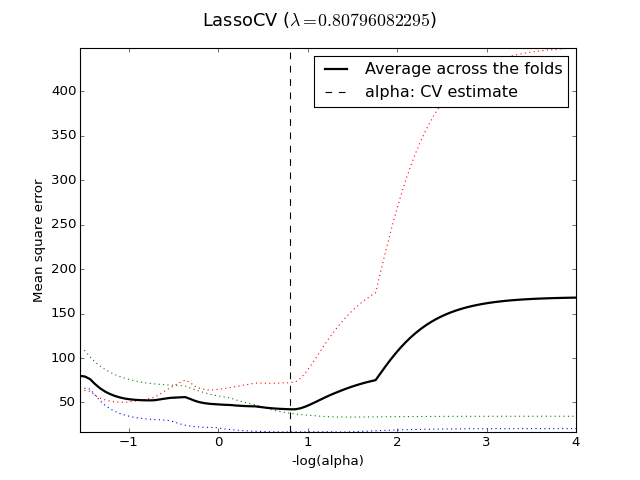

(-1.5440680443502757, 4.0, 16.818286332003773, 448.60411373990962)

In [9]:
%matplotlib notebook
model = cd.LassoCV(alphas=lambdas).fit(X, y)

m_log_alphas = -np.log10(model.alphas_)

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.suptitle('%s ($\\lambda = %s$)' % (model.__class__.__name__, -np.log10(model.alpha_)), fontsize='16')
plt.axis('tight')


### Enet / Lasso with IC

<IPython.core.display.Javascript object>


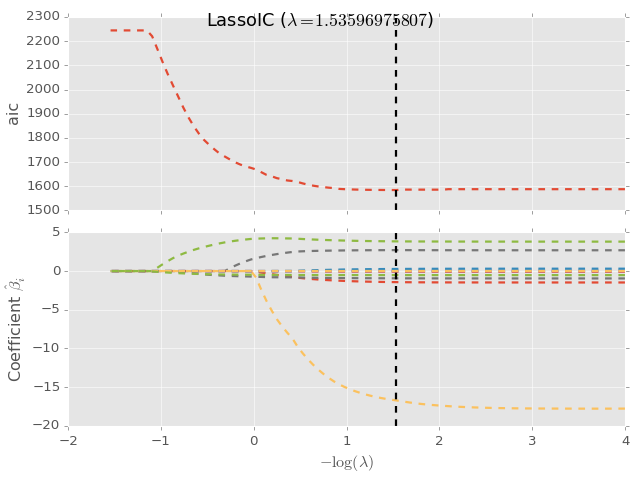

In [10]:
%matplotlib notebook
lassoAIC = glmnet.LassoIC(lambdas, criterion='AIC').fit(X, y)

lassoAIC.plot()

## Benchmarks

### No cross-validation

In [ ]:
print('scikit-learn')
%timeit cd.Lasso(alpha=1.0).fit(X, y)
%timeit cd.Lasso(alpha=1.0).fit(X, y).predict(X)

print('glmnet')
%timeit glmnet.Lasso(lambdas=1.0).fit(X, y)
%timeit glmnet.Lasso(lambdas=1.0).fit(X, y).predict(X)

In [ ]:
%matplotlib notebook

sklearn_yhat = cd.Lasso(1e-1).fit(X, y).predict(X)
glmnet_yhat = glmnet.Lasso(1e-1).fit(X, y).predict(X)

ax_min = min(sklearn_yhat.min(), glmnet_yhat.min())
ax_max = max(sklearn_yhat.max(), glmnet_yhat.max())

with plt.style.context('ggplot'):
    plt.plot(sklearn_yhat, glmnet_yhat, 'ro')
    plt.xlabel('scikit-learn Lasso $\hat{y}$ ($\log(\\alpha)=%s$)' % np.log10(cd.Lasso(1e-1).fit(X, y).alpha))
    plt.ylabel('glmnet Lasso $\hat{y}$ ($\log(\\alpha)=%s$)' % np.log10(glmnet.Lasso(1e-1).fit(X, y).lambda_))
    plt.title('Lasso')
    plt.plot([ax_min, ax_max], [ax_min, ax_max], 'k-')
    plt.tight_layout()

### Cross-validation

<IPython.core.display.Javascript object>


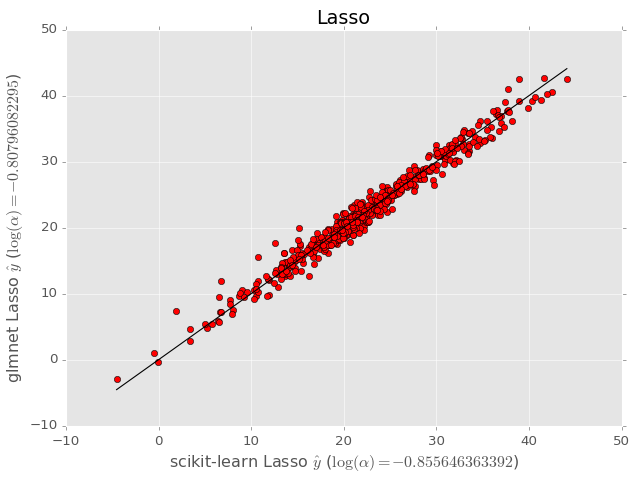

In [12]:
%matplotlib notebook

sklearn_yhat = cd.LassoCV(lambdas).fit(X, y).predict(X)
glmnet_yhat = glmnet.LassoCV(lambdas).fit(X, y).predict(X)

ax_min = min(sklearn_yhat.min(), glmnet_yhat.min())
ax_max = max(sklearn_yhat.max(), glmnet_yhat.max())

with plt.style.context('ggplot'):
    plt.plot(sklearn_yhat, glmnet_yhat, 'ro')
    plt.xlabel('scikit-learn Lasso $\hat{y}$ ($\log(\\alpha)=%s$)' % np.log10(cd.LassoCV(lambdas).fit(X, y).alpha_))
    plt.ylabel('glmnet Lasso $\hat{y}$ ($\log(\\alpha)=%s$)' % np.log10(glmnet.LassoCV(lambdas).fit(X, y).lambda_))
    plt.title('Lasso')
    plt.plot([ax_min, ax_max], [ax_min, ax_max], 'k-')
    plt.tight_layout()

**TLDR**: Python wrapped Fortran `glmnet` code is 2-4.5x faster than `scikit-learn` and while the two differ, the results are very similar. 

See: http://stats.stackexchange.com/questions/160096/what-are-the-differences-between-ridge-regression-using-rs-glmnet-and-pythons